# Boto3 - Day 2

![](https://res.cloudinary.com/practicaldev/image/fetch/s--MaGHtHUw--/c_imagga_scale,f_auto,fl_progressive,h_420,q_auto,w_1000/https://dev-to-uploads.s3.amazonaws.com/uploads/articles/e4kppkfy2639q33qzwks.jpg)


You use the AWS SDK for Python (Boto3) to create, configure, and manage AWS services, such as Amazon Elastic Compute Cloud (Amazon EC2) and Amazon Simple Storage Service (Amazon S3). The SDK provides an object-oriented API as well as low-level access to AWS services.

### Making it work for all of us.

The Credentials File
```
[default]
aws_access_key_id = 
aws_secret_access_key = 
region = us-east-1
```

Or we can use. 

```
import boto3

client = boto3.client(
    's3',
    aws_access_key_id=ACCESS_KEY,
    aws_secret_access_key=SECRET_KEY,
    aws_session_token=SESSION_TOKEN
)
```

In [1]:
import boto3

# Initialise a textract service 
client = boto3.client('textract')

print("Authentication successfull")

Authentication successfull


### Opening Image

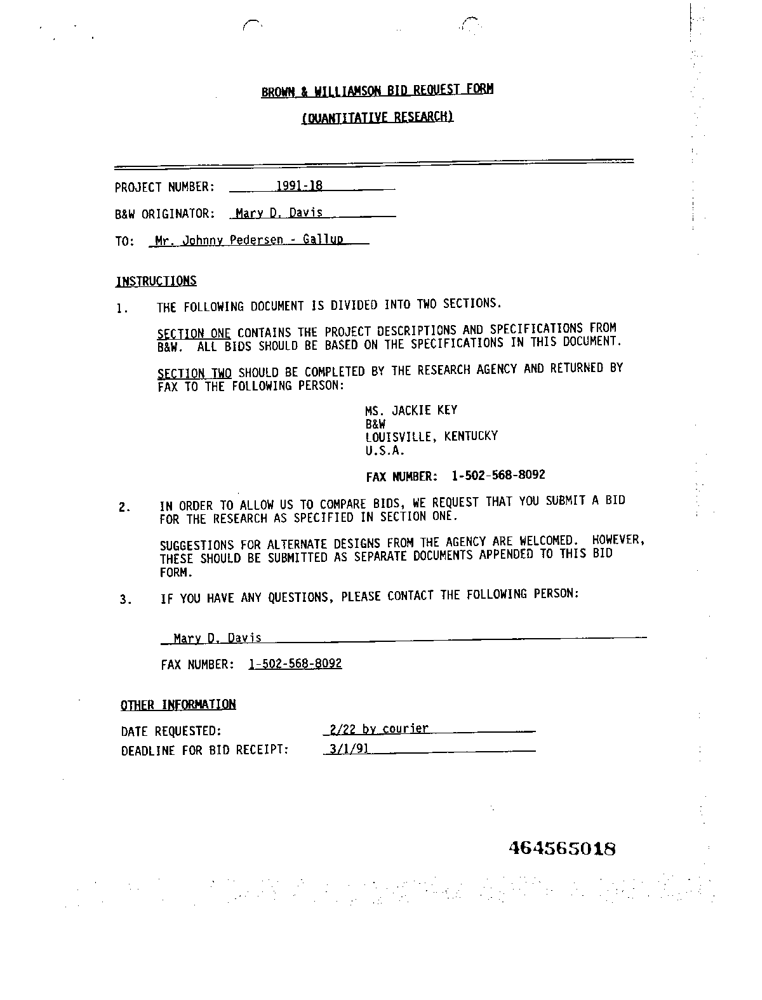

In [2]:
from PIL import Image
Image.open("images/0011845203.png")

### Converting to bytes

In [3]:
with open("images/0011845203.png", "rb") as image:
    f = image.read()
    b = bytearray(f)

In [4]:
b

bytearray(b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xfa\x00\x00\x03\xe8\x08\x00\x00\x00\x00\x8a\x1d\x05-\x00\x00 \x00IDATx\x01\xec\xc1\t@\x8di\xe37\xe0\xdf}N\xe7\xb4S\xb2\xb4K\xa4\x88\xa2\x14e\x8dR\x92\xc9\x9e5Qv\x19Y\xb2ggHc\xcb2B\xb2gy5F\x94\x92]\xa6TCB\xa4\x94R\xa2\xacmgy\xee\xaf\xc2\xbcc\xfef>\xd4\x1b9\xf7u\x11\n\x86\x91E\x84\x82ad\x11\xa1`\x18YD(\x18\xa6\x16\xe1\x16/E\xb5 \x14\x0cS\x8bp\x9e\xc1\xa8\x16\x84\x82aj\x11\xce3\x18\xd5\x82P0L-\xc2y\x06\xa3Z\x10\n\x86\xa9Mz\xfa\x9b\xe3O\xdc\xf9\xee\xf8B\x84\x82aj\x93>\x1b\x9b\xe0O\\\xb29\xbe\x10\xa1`\x98Z\x84\xf3\x0cF\xb5 \x14\x0cS\x8bp\x9e\xc1\xa8\x16\x84\x82aj\x11n\xd4.\x01\xaa\x03\xa1`\x98\xda\xc4f\xa9\x03\xaa\x03\xa1`\x98Z\x84\xf3\x0cF\xb5 \x14\x0cS\x8bp\x9e\xc1\xa8\x16\x84\x82aj\x11\xce3\x18\xd5\x82P0\xdf\xa1\xfb\xbb\x17*\xe0\xbb\xc4y\x06\xe3O\x94\xf2\xf0\xa5\x08\x05\xf3\x9dy\xb0m\xb7b\xeb\xac\x17\xc53\xe7\xe2{\xd4\xc2w4*\xe5B\xebaR?|)B\xc1|_\x92\x07\x8d\x11\x88&)\xef\xcc:n>\xdc\x19\xdf\x1f\x83\xa9\xd3_\xd4%\x00\xee\xc2\x04U@

### Making the API Call

In [5]:
response = client.detect_document_text(
    Document={
        'Bytes': b
        }
)

In [6]:
response

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 1.0,
     'Height': 0.9877456426620483,
     'Left': 0.0,
     'Top': 0.0014287104131653905},
    'Polygon': [{'X': 0.0, 'Y': 0.0042436812072992325},
     {'X': 1.0, 'Y': 0.0014287104131653905},
     {'X': 1.0, 'Y': 0.9868226051330566},
     {'X': 1.8370332327322103e-05, 'Y': 0.9891743063926697}]},
   'Id': '28f9f7fe-a3b4-48dd-881a-712d33cc0b0e',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['db3e7a81-b671-4116-8f58-ae0756cfe019',
      '956cd10c-1c5d-42af-a26b-9ff3a34467c4',
      '35832b4b-88a7-4d28-a0eb-c1f8dc8f942a',
      '2fd3da54-d17e-4e20-a9f3-b29f80827f67',
      '2029cffa-f539-48f6-9e49-a60a04db9976',
      'd32b3687-af21-4254-ac01-4e75cac68339',
      '0af76865-9faa-4bcb-a373-1c7d02319aef',
      '3b42cb53-30da-4c83-9d02-6f22f15c3b14',
      '418593c7-10ae-43a1-9b11-913a3f0398cd',
      'b7c43588-8d3c-405b-b033-9edca527dda1',
      '1b41e8b4-f3f8-458b-b660-a86a

### Now, this JSON is a pain to parse 

In comes ```Textract Response Parser```

### Textract Response Parser
You can use Textract response parser library to easily parser JSON returned by Amazon Textract. Library parses JSON and provides programming language specific constructs to work with different parts of the document. textractor is an example of PoC batch processing tool that takes advantage of Textract response parser library and generate output in multiple formats.

### Installation
```python -m pip install amazon-textract-response-parser```

In [7]:
from trp import Document

In [8]:
doc = Document(response)

In [9]:
doc

### Printing Lines

In [12]:
# Iterate over elements in the document
for page in doc.pages:
    # Print lines and words
    for line in page.lines:
        print("Line: {}--{}".format(line.text, line.confidence))

Line: BROWN & WILLIAMSON BID REQUEST FORM--99.0547103881836
Line: (QUANTITATIVE RESEARCH)--90.6500244140625
Line: PROJECT NUMBER:--98.07666778564453
Line: 1991-18--99.28861236572266
Line: B&W ORIGINATOR: Mary D. Davis--96.1739273071289
Line: TO:--99.25680541992188
Line: Mr. Johnny Pedersen - Gallup--97.04454803466797
Line: INSTRUCTIONS--99.24955749511719
Line: 1.--98.9007568359375
Line: THE FOLLOWING DOCUMENT IS DIVIDED INTO TWO SECTIONS.--99.19512939453125
Line: SECTION ONE CONTAINS THE PROJECT DESCRIPTIONS AND SPECIFICATIONS FROM--99.74654388427734
Line: B&W. ALL BIDS SHOULD BE BASED ON THE SPECIFICATIONS IN THIS DOCUMENT.--98.38948059082031
Line: SECTION TWO SHOULD BE COMPLETED BY THE RESEARCH AGENCY AND RETURNED BY--99.91436767578125
Line: FAX TO THE FOLLOWING PERSON:--97.5726318359375
Line: MS. JACKIE KEY--99.12240600585938
Line: B&W--99.84869384765625
Line: LOUISVILLE, KENTUCKY--96.419921875
Line: U.S.A.--94.87565612792969
Line: FAX NUMBER: 1-502-568-8092--98.74171447753906
Line:

### Printing words

In [13]:
# Iterate over elements in the document
for page in doc.pages:
    # Print lines and words
    for line in page.lines:
        for word in line.words:
            print("Word: {}--{}".format(word.text, word.confidence))

Word: BROWN--96.45109558105469
Word: &--99.60063934326172
Word: WILLIAMSON--99.00146484375
Word: BID--99.78709411621094
Word: REQUEST--99.61509704589844
Word: FORM--99.87288665771484
Word: (QUANTITATIVE--95.1820068359375
Word: RESEARCH)--86.1180419921875
Word: PROJECT--99.76246643066406
Word: NUMBER:--96.390869140625
Word: 1991-18--99.28861236572266
Word: B&W--99.48865509033203
Word: ORIGINATOR:--84.27520751953125
Word: Mary--99.8183364868164
Word: D.--97.52951049804688
Word: Davis--99.75794982910156
Word: TO:--99.25680541992188
Word: Mr.--98.9484634399414
Word: Johnny--99.65753173828125
Word: Pedersen--98.76375579833984
Word: ---89.98207092285156
Word: Gallup--97.87090301513672
Word: INSTRUCTIONS--99.24955749511719
Word: 1.--98.9007568359375
Word: THE--99.94879913330078
Word: FOLLOWING--99.88972473144531
Word: DOCUMENT--99.87892150878906
Word: IS--97.79987335205078
Word: DIVIDED--99.8327865600586
Word: INTO--99.90238189697266
Word: TWO--99.8409652709961
Word: SECTIONS.--96.46755218505

### Printing Both

In [14]:
# Iterate over elements in the document
for page in doc.pages:
    # Print lines and words
    for line in page.lines:
        print("Line: {}--{}".format(line.text, line.confidence))
        for word in line.words:
            print("Word: {}--{}".format(word.text, word.confidence))

Line: BROWN & WILLIAMSON BID REQUEST FORM--99.0547103881836
Word: BROWN--96.45109558105469
Word: &--99.60063934326172
Word: WILLIAMSON--99.00146484375
Word: BID--99.78709411621094
Word: REQUEST--99.61509704589844
Word: FORM--99.87288665771484
Line: (QUANTITATIVE RESEARCH)--90.6500244140625
Word: (QUANTITATIVE--95.1820068359375
Word: RESEARCH)--86.1180419921875
Line: PROJECT NUMBER:--98.07666778564453
Word: PROJECT--99.76246643066406
Word: NUMBER:--96.390869140625
Line: 1991-18--99.28861236572266
Word: 1991-18--99.28861236572266
Line: B&W ORIGINATOR: Mary D. Davis--96.1739273071289
Word: B&W--99.48865509033203
Word: ORIGINATOR:--84.27520751953125
Word: Mary--99.8183364868164
Word: D.--97.52951049804688
Word: Davis--99.75794982910156
Line: TO:--99.25680541992188
Word: TO:--99.25680541992188
Line: Mr. Johnny Pedersen - Gallup--97.04454803466797
Word: Mr.--98.9484634399414
Word: Johnny--99.65753173828125
Word: Pedersen--98.76375579833984
Word: ---89.98207092285156
Word: Gallup--97.87090301

### Working with Forms

ValueError: Could not save to JPEG for display

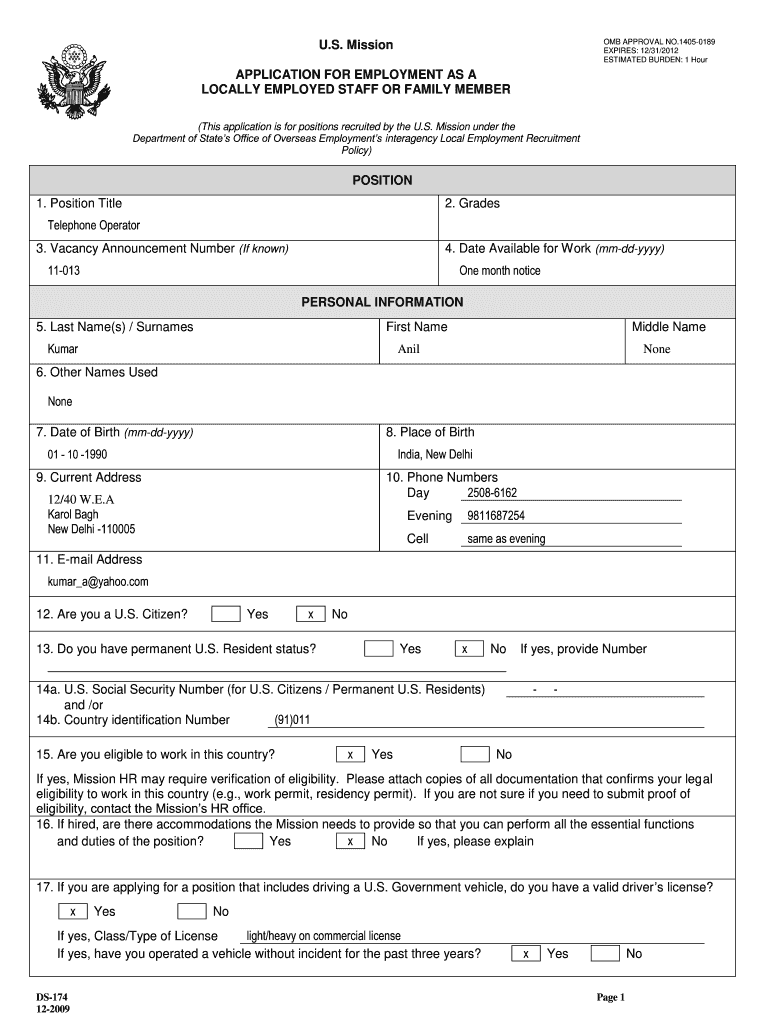

In [21]:
from PIL import Image
Image.open("images/form_sample.png")

### Converting to bytes

In [20]:
with open("images/form_sample.png", "rb") as image:
    f = image.read()
    b2 = bytearray(f)

In [22]:
### Sending via bytes
response_for_forms = client.analyze_document(
    Document={
        'Bytes': b2
    },
    FeatureTypes=['FORMS']
)

In [24]:
response_for_forms

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 1.0,
     'Height': 1.0,
     'Left': 0.0,
     'Top': 0.0},
    'Polygon': [{'X': 2.2676034916457866e-07, 'Y': 0.0},
     {'X': 1.0, 'Y': 1.3098276667733444e-06},
     {'X': 1.0, 'Y': 1.0},
     {'X': 0.0, 'Y': 1.0}]},
   'Id': '1bb03797-b110-444e-8cd0-b10bfcebce2b',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['657a5acf-aab3-49eb-8be6-8b6ad605f1dc',
      '723f8b17-c85d-41c4-91a6-a0328159fcf0',
      'bd1ea0ca-74ba-494c-8d61-4fde2387e31e',
      '78b1a468-bfda-473f-8d26-4689f828a54a',
      '369faa6f-4d4f-4dd7-b027-e3c3481a63cd',
      '0b5defbb-6d4e-4fc4-bff8-48b83b8ac821',
      '213ba078-dc1c-4269-be67-85464f35c8e2',
      '00c0b1c3-67b3-4d91-bbcb-bec94194cfe0',
      '9a28c5f0-4149-423f-9936-d3828f4511ad',
      '0ec2b79e-6787-4840-9689-fe2f87964bd7',
      '999844db-365f-4baa-90ff-4914db8fd835',
      '117edd27-210e-47d4-a92b-da3b57aef346',
      '1bea8b4a-aa2e-43

### Let's make our life easier

In [25]:
from trp import Document
doc = Document(response_for_forms)

In [30]:
# Iterate over elements in the document
for page in doc.pages:
    # Print fields
    for field in page.form.fields:
        print("Field: --------- Key: {}, --------- Value: {}".format(field.key.text, field.value))

Field: --------- Key: Yes, --------- Value: NOT_SELECTED
Field: --------- Key: Yes, --------- Value: SELECTED
Field: --------- Key: No, --------- Value: SELECTED
Field: --------- Key: 9. Current Address, --------- Value: 12/40 W.E.A Karol Bagh New Delhi -110005
Field: --------- Key: 6. Other Names Used, --------- Value: None
Field: --------- Key: 8. Place of Birth, --------- Value: India, New Delhi
Field: --------- Key: No, --------- Value: NOT_SELECTED
Field: --------- Key: 11. E-mail Address, --------- Value: kumar_a@yahoo.com
Field: --------- Key: Yes, --------- Value: SELECTED
Field: --------- Key: 7. Date of Birth (mm-dd-yyyy), --------- Value: 01 0-1990
Field: --------- Key: 1. Position Title, --------- Value: Telephone Operator
Field: --------- Key: 4. Date Available for Work (mm-dd-yyyy), --------- Value: One month notice
Field: --------- Key: 3. Vacancy Announcement Number (If known), --------- Value: 11-013
Field: --------- Key: 5. Last Name(s) / Surnames, --------- Value: Ku

### Search for a particular field

In [34]:
# Iterate over elements in the document
for page in doc.pages:
     # Get field by key
    key = "First Name"
    field = page.form.getFieldByKey(key)
    if(field):
        print("Field: Key: {}, Value: {}".format(field.key, field.value))

Field: Key: First Name, Value: Anil


### Searching

In [33]:
# Iterate over elements in the document
for page in doc.pages:
    # Search fields by key
    key = "address"
    fields = page.form.searchFieldsByKey(key)
    for field in fields:
        print("Field: Key: {}, Value: {}".format(field.key, field.value))

Field: Key: 9. Current Address, Value: 12/40 W.E.A Karol Bagh New Delhi -110005
Field: Key: 11. E-mail Address, Value: kumar_a@yahoo.com


### Working with tables

ValueError: Could not save to JPEG for display

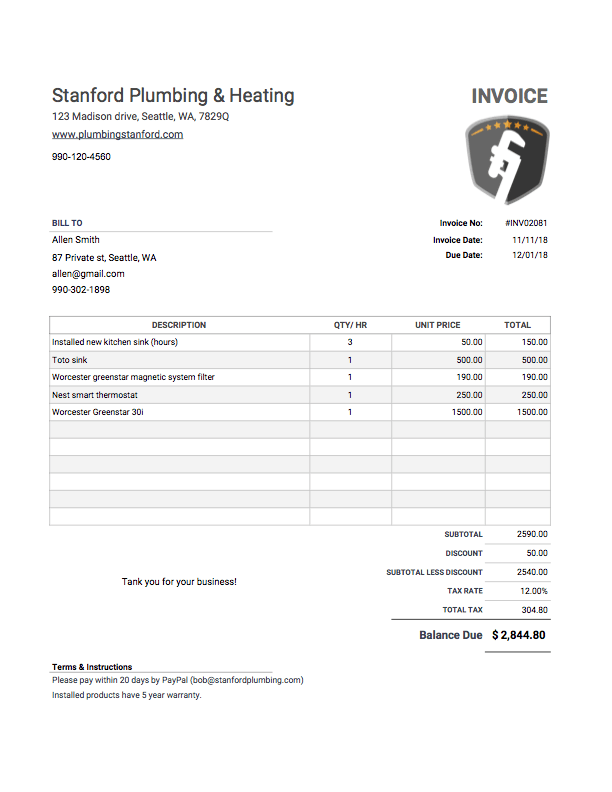

In [35]:
from PIL import Image
Image.open("images/Sample_invoice_2.png")

In [36]:
### Converting to bytes
with open("images/Sample_invoice_2.png", "rb") as image:
    f = image.read()
    b3 = bytearray(f)

In [37]:
b3

bytearray(b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02d\x00\x00\x03\x18\x08\x03\x00\x00\x00RX\x0b\x80\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00\x01sRGB\x00\xae\xce\x1c\xe9\x00\x00\x03\x00PLTE\xff\xff\xff\xd5\xd5\xd5\xfa\xfb\xfb\xf2\xf3\xf2\xe7\xe8\xe7\xdf\xdf\xdf\xee\xef\xef\xf3\xf3\xf3fff666\xe3\xe3\xe3\xce\xce\xce\xd6\xd6\xd6\xe5\xe5\xe5\xf6\xf6\xf6\xee\xed\xedFFF\xf1\xf1\xf1\xb8\xb8\xb8\xd0\xd0\xd0\xdb\xdb\xdb\xde\xdd\xde\xc9\xc9\xc9\xf9\xf9\xf9\xd1\xd1\xd1\xe6\xe6\xe6\xcf\xcf\xcf\xd8\xd8\xd8\xec\xec\xed\xfe\xfe\xfc\xff\xff\xf3\xc4\xc4\xc4\x00\x01\x00\xee\xff\xff\xf3\xff\xff:BQ\xc4\xf1\xff\\\\\\\x81\x81\x80\x86\xc8\xef\x8e>L\xff\xf8\xd3\xf4\xd6\xa5\xf3\xd2\x9c\xf7\xfe\xff\xff\xf0\xc6\xcc\x8aP\xff\xff\xee\xff\xfb\xe0\x93\xcf\xf1\xfb\xff\xff\xff\xff\xf7\xd2\xf5\xff\xf3\xcb\x87\xd3\x9e`?\x83\xc7\x99\x99\x99lji\xe9\xea\xe9\xb3\xb3\xb4d\x9c\xd0\xa6\xa7\xa7|\x86\x8ekFH\x87\x87\x87\xdc\xdd\xdcFEW\xff\xf5\xcb\xf7\xf7\xf7\xfa\xe2\xb6\x9d\xd5\xf4\xcb\xf4\xff\xd4\xd4\xd

In [39]:
### Sending via bytes
response_for_table = client.analyze_document(
    Document={
        'Bytes': b3
    },
    FeatureTypes=['TABLES']
)

In [40]:
response_for_table

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 0.9908936023712158,
     'Height': 0.9899918437004089,
     'Left': 0.005997196305543184,
     'Top': 0.00535992905497551},
    'Polygon': [{'X': 0.006307091098278761, 'Y': 0.00535992905497551},
     {'X': 0.9968908429145813, 'Y': 0.005475101061165333},
     {'X': 0.9964607954025269, 'Y': 0.9953517317771912},
     {'X': 0.005997196305543184, 'Y': 0.9950820207595825}]},
   'Id': 'a970e744-3218-48ef-b15b-0fcc21d1a51e',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['e90d6a7d-4242-4884-902c-cd0e7214c50b',
      'bdd34c65-0eb4-4f1e-a724-19100505e27b',
      '66c48c69-c5b6-4d8c-98c0-45afc467662d',
      '976abe5a-c1df-4272-bf75-ea155e5657d4',
      '96347b26-e278-4759-82bf-e3939dc6fa72',
      '520f7b58-12e6-4d6e-8b9f-4b2923e47805',
      '220ae888-633b-4d5d-81ad-06be216c18f8',
      'ef355d4d-f537-42e6-9d6d-c7e984a10da4',
      '73a6e202-be5a-477f-b5c9-3e8b2cd80a5a',
      '03

In [41]:
from trp import Document
doc = Document(response_for_table)

In [42]:
doc

In [43]:
# Iterate over elements in the document
for page in doc.pages:
    # Print tables
    for table in page.tables:
        for r, row in enumerate(table.rows):
            for c, cell in enumerate(row.cells):
                print("Table[{}][{}] = {}-{}".format(r, c, cell.text, cell.confidence))

Table[0][0] = Invoice No: -92.333984375
Table[0][1] = #INV02081 -93.701171875
Table[1][0] = Invoice Date: -88.134765625
Table[1][1] = 11/11/18 -89.453125
Table[2][0] = Due Date: -90.8203125
Table[2][1] = 12/01/18 -92.138671875
Table[0][0] = DESCRIPTION -81.005859375
Table[0][1] = QTY/ HR -76.123046875
Table[0][2] = UNIT PRICE -82.91015625
Table[0][3] = TOTAL -82.568359375
Table[1][0] = Installed new kitchen sink (hours) -84.375
Table[1][1] = 3 -79.296875
Table[1][2] = 50.00 -86.328125
Table[1][3] = 150.00 -85.986328125
Table[2][0] = Toto sink -85.25390625
Table[2][1] = 1 -80.126953125
Table[2][2] = 500.00 -87.255859375
Table[2][3] = 500.00 -86.865234375
Table[3][0] = Worcester greenstar magnetic system filter -84.375
Table[3][1] = 1 -79.296875
Table[3][2] = 190.00 -86.328125
Table[3][3] = 190.00 -85.986328125
Table[4][0] = Nest smart thermostat -85.205078125
Table[4][1] = 1 -80.029296875
Table[4][2] = 250.00 -87.158203125
Table[4][3] = 250.00 -86.767578125
Table[5][0] = Worcester Green

### Serializer/Deserializer

### Converting to bytes

In [3]:
with open("images/0011845203.png", "rb") as image:
    f = image.read()
    b = bytearray(f)

In [4]:
b

bytearray(b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xfa\x00\x00\x03\xe8\x08\x00\x00\x00\x00\x8a\x1d\x05-\x00\x00 \x00IDATx\x01\xec\xc1\t@\x8di\xe37\xe0\xdf}N\xe7\xb4S\xb2\xb4K\xa4\x88\xa2\x14e\x8dR\x92\xc9\x9e5Qv\x19Y\xb2ggHc\xcb2B\xb2gy5F\x94\x92]\xa6TCB\xa4\x94R\xa2\xacmgy\xee\xaf\xc2\xbcc\xfef>\xd4\x1b9\xf7u\x11\n\x86\x91E\x84\x82ad\x11\xa1`\x18YD(\x18\xa6\x16\xe1\x16/E\xb5 \x14\x0cS\x8bp\x9e\xc1\xa8\x16\x84\x82aj\x11\xce3\x18\xd5\x82P0L-\xc2y\x06\xa3Z\x10\n\x86\xa9Mz\xfa\x9b\xe3O\xdc\xf9\xee\xf8B\x84\x82aj\x93>\x1b\x9b\xe0O\\\xb29\xbe\x10\xa1`\x98Z\x84\xf3\x0cF\xb5 \x14\x0cS\x8bp\x9e\xc1\xa8\x16\x84\x82aj\x11n\xd4.\x01\xaa\x03\xa1`\x98\xda\xc4f\xa9\x03\xaa\x03\xa1`\x98Z\x84\xf3\x0cF\xb5 \x14\x0cS\x8bp\x9e\xc1\xa8\x16\x84\x82aj\x11\xce3\x18\xd5\x82P0\xdf\xa1\xfb\xbb\x17*\xe0\xbb\xc4y\x06\xe3O\x94\xf2\xf0\xa5\x08\x05\xf3\x9dy\xb0m\xb7b\xeb\xac\x17\xc53\xe7\xe2{\xd4\xc2w4*\xe5B\xebaR?|)B\xc1|_\x92\x07\x8d\x11\x88&)\xef\xcc:n>\xdc\x19\xdf\x1f\x83\xa9\xd3_\xd4%\x00\xee\xc2\x04U@

### Making the API Call

In [5]:
response = client.detect_document_text(
    Document={
        'Bytes': b
        }
)

In [6]:
response

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 1.0,
     'Height': 0.9877456426620483,
     'Left': 0.0,
     'Top': 0.0014287104131653905},
    'Polygon': [{'X': 0.0, 'Y': 0.0042436812072992325},
     {'X': 1.0, 'Y': 0.0014287104131653905},
     {'X': 1.0, 'Y': 0.9868226051330566},
     {'X': 1.8370332327322103e-05, 'Y': 0.9891743063926697}]},
   'Id': '151f08f0-18aa-46f8-a001-d19e7f91566f',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['bd7eccd3-855a-4162-b641-0d48f362dd39',
      '4051f0a3-723c-4d8f-89f0-8d32a684208f',
      '2928b4f5-6155-4afc-b820-04e04f7d57c9',
      '710691a8-8e70-458c-8bab-c464d8131b0b',
      '0c0f5d3f-7adb-4f23-a509-4866a31b7ec2',
      'c6f3e935-fe4f-499a-8f62-8dddc63d2b53',
      'ac452b2a-b584-46f8-aae6-29287b504c7d',
      '94fe5f0c-1ad1-43ad-bc1f-90c5c3a80914',
      '6c46248e-969b-4e11-adef-4894b81bf686',
      'dcf594f8-78fd-4d21-a677-6077d9137fc9',
      '290de83b-9456-4992-a8ea-ba76

In [7]:
# j holds the Textract JSON dict
from trp.trp2 import TDocument, TDocumentSchema
t_doc = TDocumentSchema().load(response)

In [9]:
t_doc

TDocument(document_metadata=TDocumentMetadata(pages=1), blocks=[TBlock(geometry=TGeometry(bounding_box=TBoundingBox(width=1.0, height=0.9877456426620483, left=0.0, top=0.0014287104131653905), polygon=[TPoint(x=0.0, y=0.0042436812072992325), TPoint(x=1.0, y=0.0014287104131653905), TPoint(x=1.0, y=0.9868226051330566), TPoint(x=1.8370332327322103e-05, y=0.9891743063926697)]), id='151f08f0-18aa-46f8-a001-d19e7f91566f', block_type='PAGE', relationships=[TRelationship(type='CHILD', ids=['bd7eccd3-855a-4162-b641-0d48f362dd39', '4051f0a3-723c-4d8f-89f0-8d32a684208f', '2928b4f5-6155-4afc-b820-04e04f7d57c9', '710691a8-8e70-458c-8bab-c464d8131b0b', '0c0f5d3f-7adb-4f23-a509-4866a31b7ec2', 'c6f3e935-fe4f-499a-8f62-8dddc63d2b53', 'ac452b2a-b584-46f8-aae6-29287b504c7d', '94fe5f0c-1ad1-43ad-bc1f-90c5c3a80914', '6c46248e-969b-4e11-adef-4894b81bf686', 'dcf594f8-78fd-4d21-a677-6077d9137fc9', '290de83b-9456-4992-a8ea-ba764b6b87da', '5492c089-0027-48d9-92cd-319a964e4a13', '98782cb7-0b8c-4dc7-b60d-3c2350439

In [10]:
type(t_doc)

trp.trp2.TDocument

In [14]:
t_doc.

[TBlock(geometry=TGeometry(bounding_box=TBoundingBox(width=1.0, height=0.9877456426620483, left=0.0, top=0.0014287104131653905), polygon=[TPoint(x=0.0, y=0.0042436812072992325), TPoint(x=1.0, y=0.0014287104131653905), TPoint(x=1.0, y=0.9868226051330566), TPoint(x=1.8370332327322103e-05, y=0.9891743063926697)]), id='151f08f0-18aa-46f8-a001-d19e7f91566f', block_type='PAGE', relationships=[TRelationship(type='CHILD', ids=['bd7eccd3-855a-4162-b641-0d48f362dd39', '4051f0a3-723c-4d8f-89f0-8d32a684208f', '2928b4f5-6155-4afc-b820-04e04f7d57c9', '710691a8-8e70-458c-8bab-c464d8131b0b', '0c0f5d3f-7adb-4f23-a509-4866a31b7ec2', 'c6f3e935-fe4f-499a-8f62-8dddc63d2b53', 'ac452b2a-b584-46f8-aae6-29287b504c7d', '94fe5f0c-1ad1-43ad-bc1f-90c5c3a80914', '6c46248e-969b-4e11-adef-4894b81bf686', 'dcf594f8-78fd-4d21-a677-6077d9137fc9', '290de83b-9456-4992-a8ea-ba764b6b87da', '5492c089-0027-48d9-92cd-319a964e4a13', '98782cb7-0b8c-4dc7-b60d-3c23504394fc', 'e487eba9-597f-4d4e-a83d-5dd43cfb13b4', '89f91026-de2e-42